# 01 Model Selection

This notebook allows you to import already created Keras models, investigate them, and evaluate them on selected testsets.
For creating models and examples see the notebooks which the prefix `M_`.

In [2]:
%run '00_README.ipynb'
%run 'H01_Models.ipynb'

Importing libraries and helper functions from 00_README.ipynb


ModuleNotFoundError: No module named 'tensorflow'

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
model_selection = widgets.Dropdown(
    options=glob.glob("keras-model/*.h5"),
    description='Select model:',
)
display(model_selection)

Dropdown(description='Select model:', options=('keras-model/01a_LeNet-MNIST.h5', 'keras-model/01b_ResNet20_CIF…

In [3]:
tf_model_file = model_selection.value
tf_model = tf.keras.models.load_model(tf_model_file)
tf_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Loading test and verification sets

For custom models, create a Python script which sets the following variable and place it in the `keras-model` folder:
```
x_train 
x_test 
y_train 
y_test
x_train_normalized
x_test_normalized 
INPUT_LENGTH
OUTPUT_LENGTH 
```

See `keras-model/01a_LeNet-MNIST_data.py` ([link](keras-model/01a_LeNet-MNIST_data.py)) as an example.

In [1]:
 data_selection = widgets.Dropdown(
    options=sorted(glob.glob("keras-model/*.py")),
    description='Select model:',
    layout=Layout(width='100%')
)
display(data_selection)

NameError: name 'widgets' is not defined

In [5]:
tf_model_data = data_selection.value
%run -i {tf_model_data}

The input length is 100 and the output length 10


---
## Some tests and visualizations for the model

### Running a single inference

Picks a random image from testset and then runs local inference using the original Keras model.

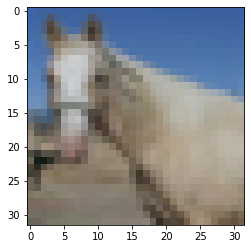

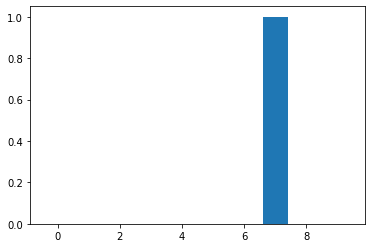

In [5]:
# for picking a different random image
# random image gets picked by helper H01
# image_no = np.random.randint(10000)

# use a single example image from the normalized training set
result = tf_model.predict(np.array( [ x_test_normalized[image_no] ] ))

plt.imshow(x_test_normalized[image_no].squeeze(), cmap=plt.cm.gray_r)
plt.show()
plt.figure()
plt.bar(np.arange(10), result[0])
plt.show()

### Evaluate against the test set

[Losses Documentation](https://keras.io/api/losses/)


We used the `categorical_crossentropy` loss for training.

In [6]:
score = tf_model.evaluate(x=x_test_normalized, y=y_test, verbose=0)

tf_model_loss = score[0]
tf_model_accuracy = score[1]

print('Test accuracy:\t', tf_model_accuracy)
print('Test loss:\t', tf_model_loss)

Test accuracy:	 0.9185000061988831
Test loss:	 0.4342728555202484


In [8]:
prediction = tf_model.predict(x_test_normalized)

This should match our previous loss from the `model.evaluate()` function.

In [9]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(reduction='sum_over_batch_size')
crossentropy_loss = loss_fn(y_test, prediction)
print('Test crossentropy loss:\t', crossentropy_loss.numpy())

Test crossentropy loss:	 0.31073594


In [10]:
prediction_delta = np.mean((prediction - y_test) ** 2)

print('Test squared loss (manually):\t', prediction_delta)

Test squared loss (manually):	 0.012822627


In [11]:
loss_fn = tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size')
squared_loss = loss_fn(y_test, prediction)
print('Test squared loss:\t', squared_loss.numpy())

Test squared loss:	 0.012822624


## Estimating the number of FLOPs

Estimates based on [TF Profiler](https://www.tensorflow.org/guide/profiler) and the libray [keras-flops](https://github.com/tokusumi/keras-flops).

### TF Profiler

In [12]:
profiler_get_flops(tf_model_file)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


1625631

### Keras-flops package

In [ ]:
keras_flops_get_flops(tf_model_file)

---